In [91]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [92]:
#1) 데이터 셋 : tf.keras.datasets.mnist, load_data()
data_train, data_test = tf.keras.datasets.mnist.load_data()

In [93]:
# 2) 훈련 데이터 셋과 테스트 데이터 셋을 분할 (테스트 데이터 세트 20%)
# 해당 데이터는 60000:10000으로 이미 나뉘어져 있었음.
# 실제 데이터 활용 시 train_test_split(x, y, stratify=y, test_size=0.2) 적용
from sklearn.model_selection import train_test_split

(x, y), (x_test, y_test) = data

# 3) 훈련 데이터 셋은 훈련, 검증으로 분할 (분할 율 : 8:2)
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size=0.2)

(60000,)


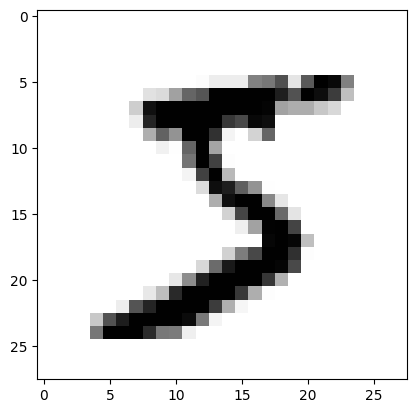

In [94]:
# 이미지 프리뷰
plt.imshow(x[0], cmap='binary')
print(y.shape)

In [95]:
# 개별 데이터 갯수 카운트
print(np.bincount(y_train), np.bincount(y_val))

[4738 5394 4766 4905 4674 4337 4734 5012 4681 4759] [1185 1348 1192 1226 1168 1084 1184 1253 1170 1190]


In [96]:
# 원 핫 인코딩 과정
from tensorflow.keras.utils import to_categorical


def one_hot_encoding(x_, y_):
    # 데이터 정규화 과정
    x_ = x_ / 255  # 0~255 까지의 값을 0~1로 출력
    x_ = x_.reshape(-1, 28, 28, 1)
    y_encoded = to_categorical(y_)  # 데이터 이진화
    return x_, y_encoded


x_train, y_train_encoded = one_hot_encoding(x_train, y_train)
x_val, y_val_encoded = one_hot_encoding(x_val, y_val)
x_test, y_test_encoded = one_hot_encoding(x_test,y_test)

print(x_train.shape, y_train_encoded.shape , '\n',
      x_val.shape, y_val_encoded.shape, '\n',
      x_test.shape, y_test_encoded.shape)

(48000, 28, 28, 1) (48000, 10) 
 (12000, 28, 28, 1) (12000, 10) 
 (10000, 28, 28, 1) (10000, 10)


In [97]:
# 분류 알고리즘 불러오기
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [98]:
model = Sequential([
    Conv2D(kernel_size=(3, 3), filters=64, input_shape=(28, 28, 1), padding='same', activation='relu'),
    Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
    Conv2D(kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.5),
    Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax'),

])

In [102]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[tf.keras.metrics.SparseCategoricalCrossentropy()])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)             

In [107]:
model.fit(x_train, y_train_encoded, batch_size=100, epochs=10, validation_data=(x_test, y_test_encoded))

(10000, 10) (48000, 10)
